<a href="https://colab.research.google.com/github/jeffersondamasceno/Estatistica-LLM-Atividade1/blob/main/Estatistica_LLM_Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SILLM - Atividade 1**
Discente: Jefferson William da Silva Damasceno | 202211140036
---

## Parte 1: Z-score e *Binomial Distribution*

### **A:** Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme prodecimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.
---

O dataset escolhido para esta atividade é o **Seeds**, da UCI (*University of California, Irvine*) Machine Learning Repository. Esse dataset possui informações sobre sementes de três variedades de trigo, reunidas por meio da análise de imagens.

O Seeds contém 210 amostras, cada uma com sete características relacionadas à geometria das sementes. As classes são as três variedades: *Karma*, *Rosa* e *Canadian*.

In [11]:
# Imports e URL (devem ser executados primeiro para que o resto funcione)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
import math

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

/tmp/ipython-input-4193771864.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=colunas)


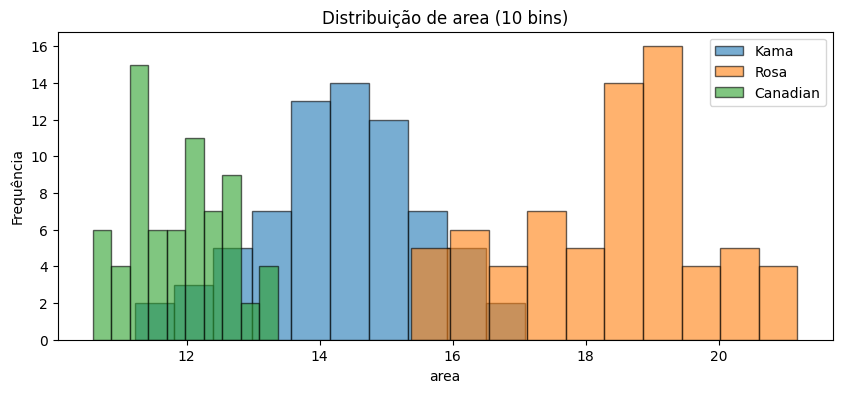

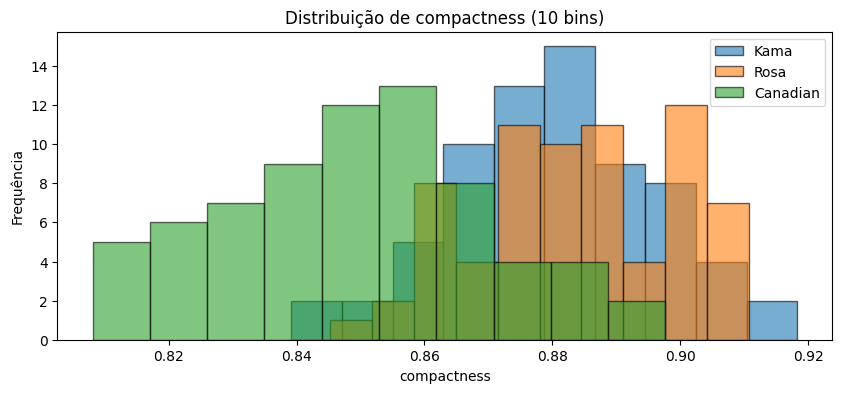

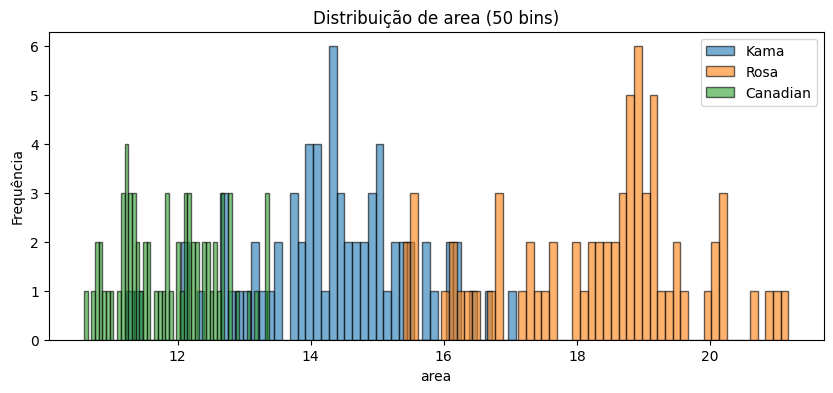

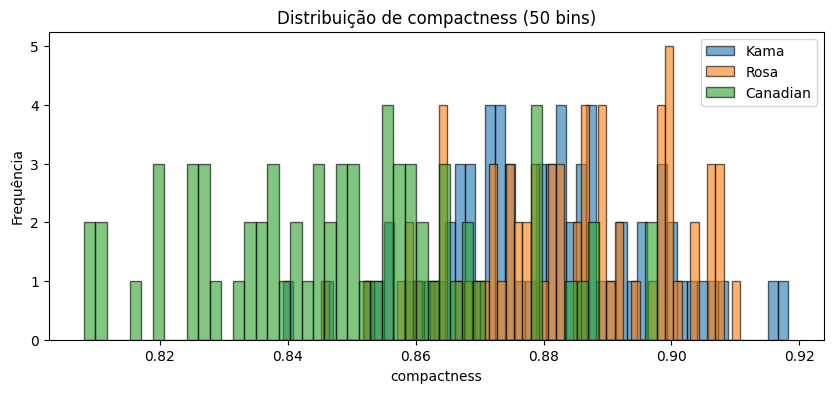

In [ ]:
colunas = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", "kernel_groove_length", "class"]

df = pd.read_csv(url, delim_whitespace=True, names=colunas)
df["class"] = df["class"].map({1: "Kama", 2: "Rosa", 3: "Canadian"})
df.head()

features = ["area", "compactness"]
bins_p = 10
bins_g = 50

for feature in features:
  plt.figure(figsize=(10, 4))
  for cls in df["class"].unique():
    subset = df[df["class"] == cls][feature]
    plt.hist(subset, bins_p, alpha=0.6, label=cls, edgecolor="black")
  plt.title(f"Distribuição de {feature} ({bins_p} bins)")
  plt.xlabel(feature)
  plt.ylabel("Frequência")
  plt.legend()
  plt.show()

for feature in features:
  plt.figure(figsize=(10, 4))
  for cls in df["class"].unique():
    subset = df[df["class"] == cls][feature]
    plt.hist(subset, bins_g, alpha=0.6, label=cls, edgecolor="black")
  plt.title(f"Distribuição de {feature} ({bins_g} bins)")
  plt.xlabel(feature)
  plt.ylabel("Frequência")
  plt.legend()
  plt.show()


Perante análise, é possível observar que a feature *area* exibe uma separação decente entre as três classes, dando destaque para o tipo *Rosa*, enquanto a *compactness* possui grande sobreposição entre os valores 0.84 a 0.90, tornando sua capacidade de distinção entre os três tipos bem fraco, apesar de distinguirbem o tipo *Canadian*.

Os tamanhos de bins utilizados foram 10 para generalizar, e 50 para detalhar.

No tamanho 10, é notável a sobreposição das classes nas duas features, com *area* tendo-a nos extremos do tipo *Kama*, e em *compactness* entre *Kama* e *Rosa*.

Já no tamanho 50, enquanto não há muita diferença na feature *compactness*, é distinta a separação dos três tipos na *area*, especialmente nas classes *Kama* e *Rosa*.

---
### **B:** Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partindo da versão não padronizada e depois os cálculos na versão padronizada. Sempre considerando o contexto do seu primeiro trabalho. Use uma função de Python e uma tabela para obter os valores de probabilidade.
---

/tmp/ipython-input-2763617088.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=colunas)


Média:  18.334285714285713
Desvio padrão:  1.4394962599470882


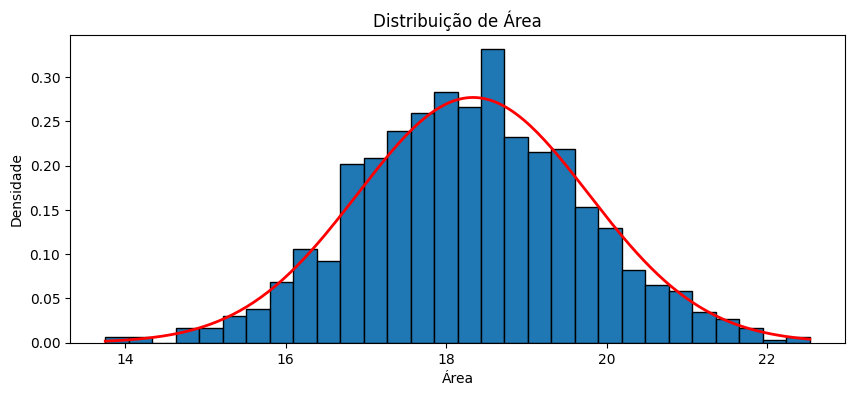

Probabilidade de uma semente ter área maior do que 18:  0.591818017411215
Probabilidade usando z-score:  0.591818017411215


In [ ]:
colunas = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", "kernel_groove_length", "class"]

df = pd.read_csv(url, delim_whitespace=True, names=colunas)
df["class"] = df["class"].map({1: "Kama", 2: "Rosa", 3: "Canadian"})
df.head()

data_vdd = df[df["class"] == "Rosa"]["area"]

media = data_vdd.mean()
du = data_vdd.std()

print("Média: ", media)
print("Desvio padrão: ", du)

np.random.seed(2025)
amostras = np.random.normal(media, du, 1000)

plt.figure(figsize=(10, 4))
count, bins, ignored = plt.hist(amostras, 30, density=True, edgecolor="black")

x = np.linspace(min(amostras), max(amostras), 200)
pdf = norm.pdf(x, media, du)

plt.plot(x, pdf, linewidth=2, color='r')

plt.title("Distribuição de Área")
plt.xlabel("Área")
plt.ylabel("Densidade")
plt.show()

valor = 18
n_padrao = 1 - norm.cdf(valor, media, du)
print("Probabilidade de uma semente ter área maior do que 18: ", n_padrao)

z_score = (valor - media) / du
padrao = 1 - norm.cdf(z_score)
print("Probabilidade usando z-score: ", padrao)


Aqui, a variável que foi escolhida a área das sementes do tipo *Rosa*. Ela representa a área física de cada semente medida por análise de imagem.
É uma variável contínua, apresentando variação natural.

Para simulação, foi criada uma população artificial, de forma que represente o comportamento da área das sementes do tipo escolhido. Isso foi feito pegando a média e o desvio padrão dos valores reais da feature, e então gerando mil valores artificiais usando uma distribuição **normal**.

Com os dados criados, é gerado um histograma, permitindo a visualização da frequência com que os valores da área ocorrem no conjunto simulado. Após isso, uma curva **normal** é sobreposta sobre o histograma, utilizando a média e o desvio padrão.

O evento de interesse definido é a probabilidade de uma semente possuir uma área maior do que 18 unidades.

Então, foi utilizada a CDF da distribuição norma para calcular se $P (X > 18)$.

Por fim, o valor foi transformado para a versão padronizada (o Z-score), usando da fórmula $\frac{z = (x - \mu)}{\sigma}$, e então é calculado o $P (Z > z)$.

A obtenção das probabilidades foi feita com o uso da função `scipy.stats.norm.cdf`.

---
### **C:** Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.
---

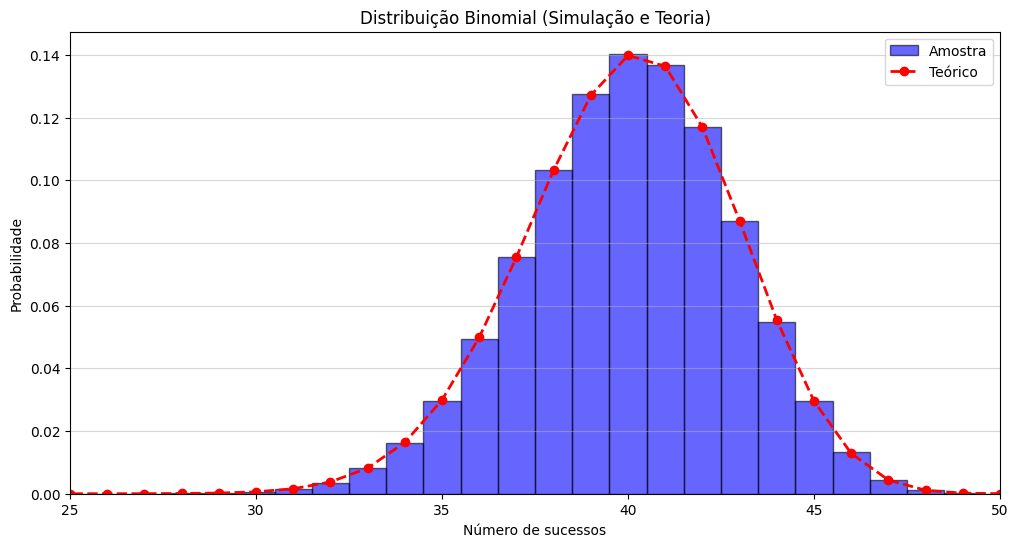

Média Amostral:  40.00509
Média Teórica:  40.0
Amostras:  [39 39 40 32 47 43 37 37 38 45]


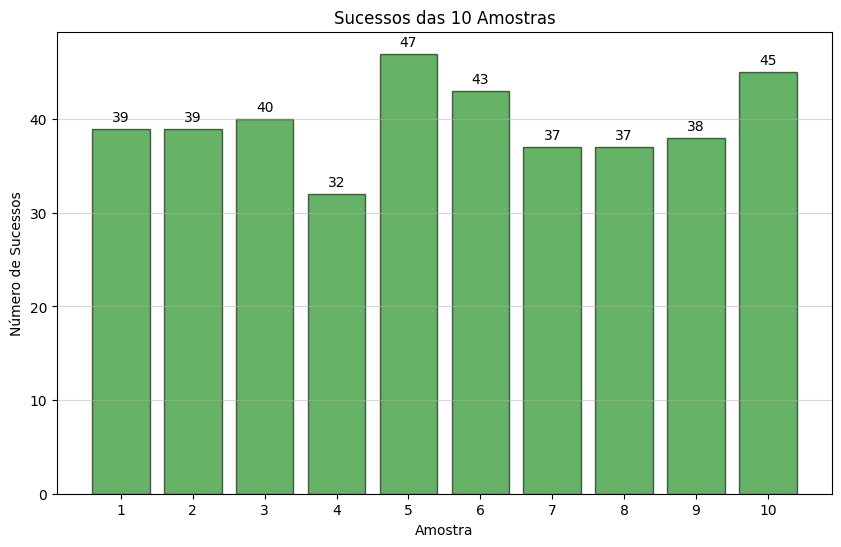

In [ ]:
n = 50
s = 0.8
q = 1 - s
qtd_amostras = 100000

dados = np.random.binomial(n=n, p=s, size=qtd_amostras)

plt.figure(figsize=(12, 6))
cont, bins, patches = plt.hist(dados, bins=np.arange(n+2)-0.5, density=True, alpha=0.6, color='b', edgecolor="black", label="Amostra")

x_valor = np.arange(0, n+1)
p_teorico = [math.comb(n, x) * (s ** x) * (q ** (n - x)) for x in x_valor]

plt.plot(x_valor, p_teorico, 'r--o', label="Teórico", linewidth=2)
plt.title("Distribuição Binomial (Simulação e Teoria)")
plt.xlabel("Número de sucessos")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(axis="y", alpha=0.5)
plt.xlim(25, 50)
plt.show()

media_s = np.mean(dados)
media_t = n * s
print("Média Amostral: ", media_s)
print("Média Teórica: ", media_t)

amostras10 = dados[:10]
print("Amostras: ", amostras10)

plt.figure(figsize=(10, 6))
barras = plt.bar(np.arange(len(amostras10)), height=amostras10, alpha=0.6, color='g', edgecolor='black')

for barra in barras:
  valor = barra.get_height()
  plt.text(barra.get_x() + barra.get_width() / 2, valor + 0.5, int(valor), ha='center', va='bottom')
plt.title("Sucessos das 10 Amostras")
plt.xlabel("Amostra")
plt.ylabel("Número de Sucessos")
plt.xticks(np.arange(len(amostras10)), labels=[f'{i+1}' for i in range(len(amostras10))])
plt.grid(axis="y", alpha=0.5)
plt.show()



Aqui, o $p$ ($s$ no código, já que foi o solicitado no slide) foi ajustado para $0.8$. $n = 50$ por ser o valor utilizado no slide.

Foi utilizada a equação da probabilidade binomial ($P(x) = \binom{n}{x} s^x (1 - s)^{n-x}$) para obter a distribuição teórica. Então, foram geradas $100.000$ amostras aleatórias para comparar a distribuição simulada com a teórica. Enfim, foram isoladas as $10$ primeiras amostras em um histograma, cada uma tendo os seus respectivos sucessos, a fim de visualizar a variabilidade.

Como descrito na teoria, as quantidades de sucessos por amostra estão na margem de $40$, que é $80$% do valor escolhido para $n$ ($50$).

---
## Parte 2: *Sample distribution and sampling distribution*, TLC e *p-value*
---

### **A:** *sample distribution* and *sampling distribution*

#### A partir do que foi feito na Atividade 2 "Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho, crie uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

---

/tmp/ipython-input-2348614410.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=colunas)


Média:  18.334285714285713
Desvio padrão:  1.4394962599470882


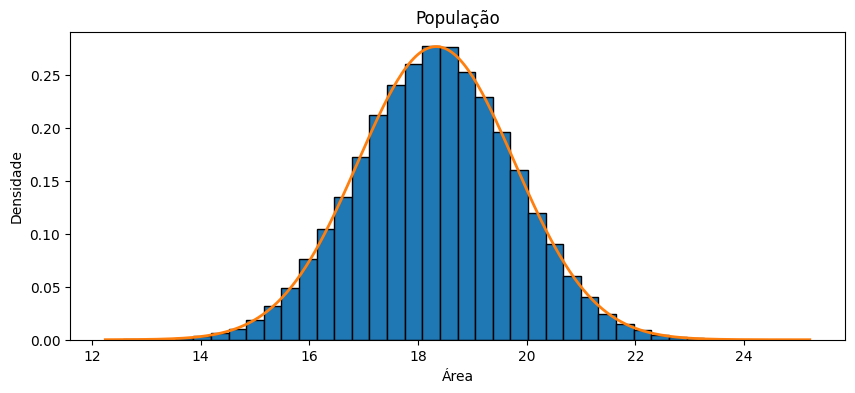

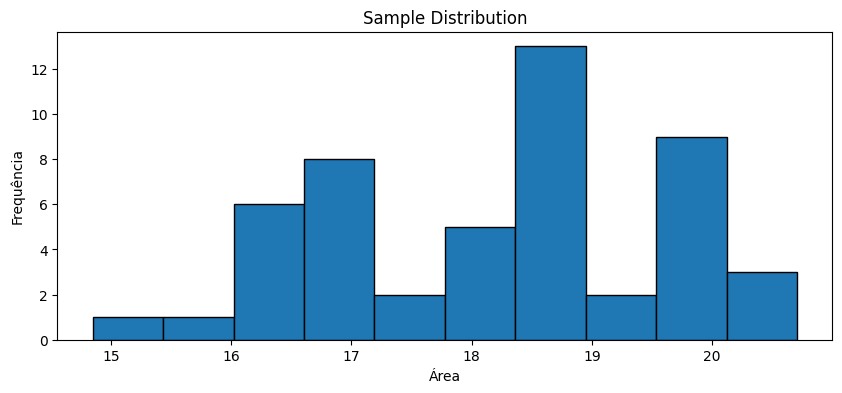

Média da amostra:  18.182613335938804
Desvio padrão da amostra:  1.382302404194509


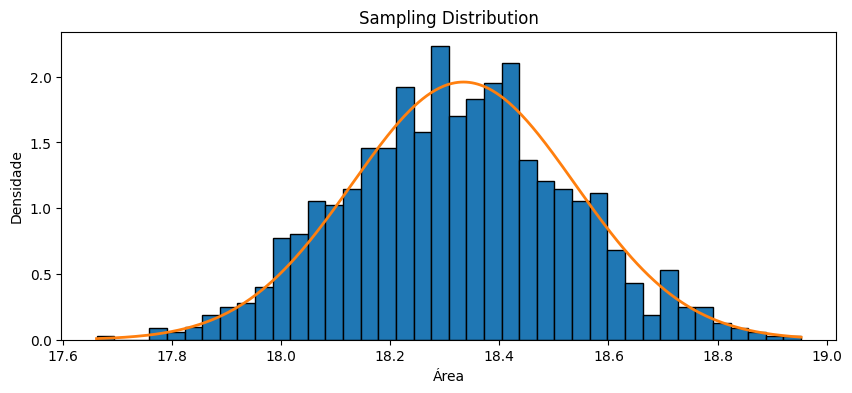

Probabilidade de uma semente ter área maior do que 18:  0.9497124907005096


In [8]:
colunas = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", "kernel_groove_length", "class"]

df = pd.read_csv(url, delim_whitespace=True, names=colunas)
df["class"] = df["class"].map({1: "Kama", 2: "Rosa", 3: "Canadian"})

data_vdd = df[df["class"] == "Rosa"]["area"]

media = data_vdd.mean()
desvio = data_vdd.std()

print("Média: ", media)
print("Desvio padrão: ", desvio)

np.random.seed(2025)
populacao = np.random.normal(media, desvio, 100000)

plt.figure(figsize=(10, 4))
plt.hist(populacao, bins=40, density=True, edgecolor="black")
x = np.linspace(min(populacao), max(populacao), 300)
plt.plot(x, norm.pdf(x, media, desvio), linewidth=2)
plt.title("População")
plt.xlabel("Área")
plt.ylabel("Densidade")
plt.show()

n = 50
amostra = np.random.choice(populacao, size=n, replace=False)

plt.figure(figsize=(10, 4))
plt.hist(amostra, bins=10, edgecolor="black")
plt.title("Sample Distribution")
plt.xlabel("Área")
plt.ylabel("Frequência")
plt.show()

print("Média da amostra: ", np.mean(amostra))
print("Desvio padrão da amostra: ", np.std(amostra))

rep = 1000
medias = []

for _ in range(rep):
  s = np.random.choice(populacao, size=n, replace=False)
  medias.append(np.mean(s))

medias = np.array(medias)

plt.figure(figsize=(10, 4))
plt.hist(medias, bins=40, density=True, edgecolor="black")

x = np.linspace(min(medias), max(medias), 500)
plt.plot(x, norm.pdf(x, media, desvio / np.sqrt(n)), linewidth=2)

plt.title("Sampling Distribution")
plt.xlabel("Área")
plt.ylabel("Densidade")
plt.show()

valor = 18
probabilidade = 1 - norm.cdf(valor, media, desvio / np.sqrt(n))
print("Probabilidade de uma semente ter área maior do que 18: ", probabilidade)

---
### **B:** *TLC*

#### Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

---

Média teórica:  4
Desvio padrão teórica:  2.8284271247461903


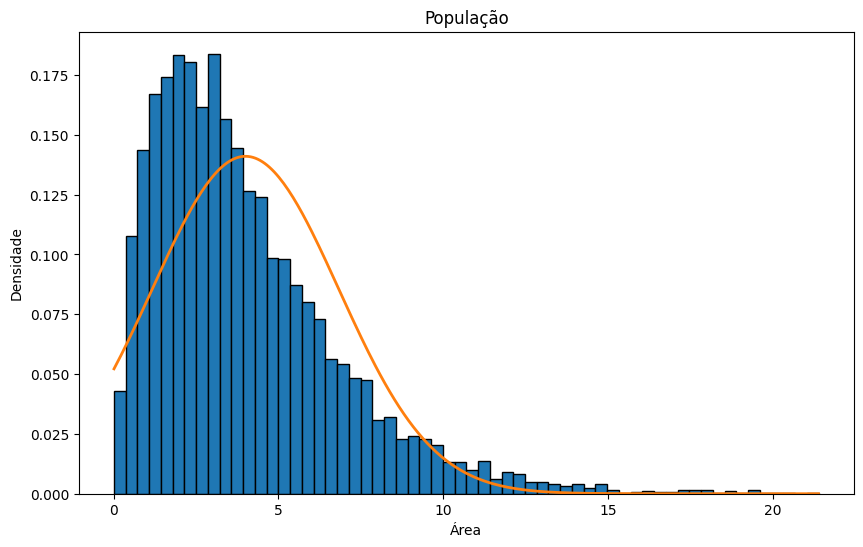

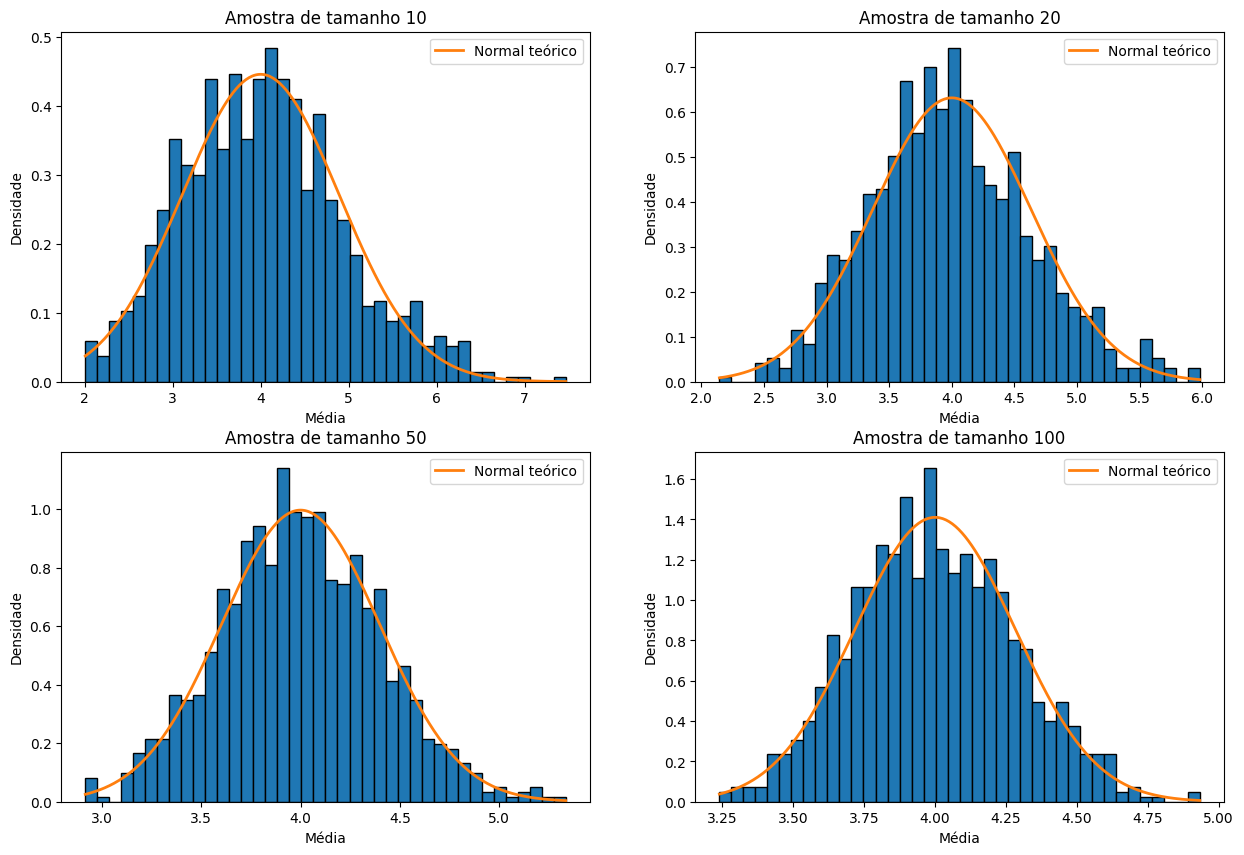


Resumo: 


,Tamanho da Amostra,Média Amostral,Desvio Padrão Amostral,Desvio Padrão Amostral Teórico,Assimetria
0,10,4.029253,0.912774,0.894427,0.388915
1,20,3.982268,0.636674,0.632456,0.299906
2,50,3.998205,0.400222,0.400000,0.154850
3,100,3.996585,0.280734,0.282843,0.156866


In [21]:
np.random.seed(2025)

forma = 2
escala = 2
tamanho = 10000

media_t = forma * escala
variancia_t = forma * (escala ** 2)
desvio_t = math.sqrt(variancia_t)

print("Média teórica: ", media_t)
print("Desvio padrão teórica: ", desvio_t)

populacao_gama = np.random.gamma(shape=forma, scale=escala, size=tamanho)

plt.figure(figsize=(10, 6))
plt.hist(populacao_gama, bins=60, density=True, edgecolor="black")
x = np.linspace(populacao_gama.min(), populacao_gama.max(), 300)
plt.plot(x, norm.pdf(x, media_t, desvio_t), linewidth=2)
plt.title("População")
plt.xlabel("Área")
plt.ylabel("Densidade")
plt.show()

tamanhos_amostras = [10, 20, 50, 100]
rep_sampling = 1000
resultados = []

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, n in enumerate(tamanhos_amostras):
  medias_amostra = np.empty(rep_sampling)

  for i in range(rep_sampling):
    amostra_gama = np.random.choice(populacao_gama, size=n, replace=False)
    medias_amostra[i] = np.mean(amostra_gama)

  media_emp = np.mean(medias_amostra)
  desvio_emp = np.std(medias_amostra)
  desvio_t_amostral = desvio_t / np.sqrt(n)
  assimetria = skew(medias_amostra)

  resultados.append({
      "n": n,
      "media_emp": media_emp,
      "desvio_emp": desvio_emp,
      "desvio_t_amostral": desvio_t_amostral,
      "assimetria": assimetria
  })

  axi = axs[idx]
  axi.hist(medias_amostra, bins=40, density=True, edgecolor="black")
  x_m = np.linspace(min(medias_amostra), max(medias_amostra), 300)
  axi.plot(x_m, norm.pdf(x_m, media_t, desvio_t_amostral), linewidth=2, label="Normal teórico")
  axi.set_title(f"Amostra de tamanho {n}")
  axi.set_xlabel("Média")
  axi.set_ylabel("Densidade")
  axi.legend()

plt.show()

df_resultado = pd.DataFrame(resultados)
df_resultado = df_resultado[["n", "media_emp", "desvio_emp", "desvio_t_amostral", "assimetria"]]
df_resultado = df_resultado.rename(columns={
    "n": "Tamanho da Amostra",
    "media_emp": "Média Amostral",
    "desvio_emp": "Desvio Padrão Amostral",
    "desvio_t_amostral": "Desvio Padrão Amostral Teórico",
    "assimetria": "Assimetria"
})

print("\nResumo: ")
display(df_resultado)

---
### **C:** *p-value*

#### Faça um programa que mostra passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

---

/tmp/ipython-input-1630530015.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


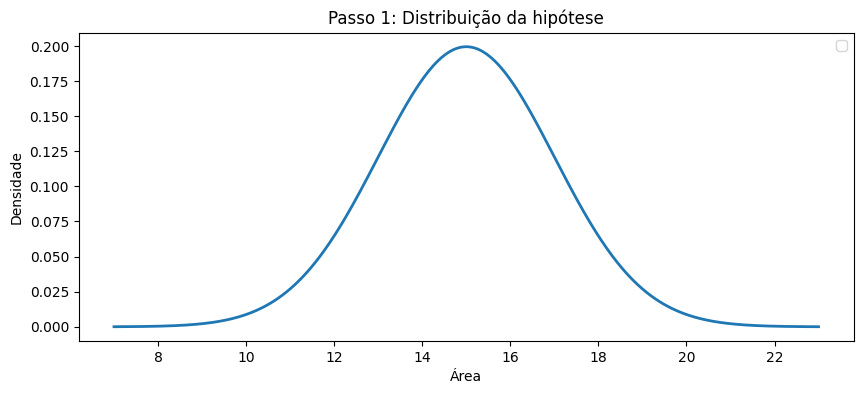

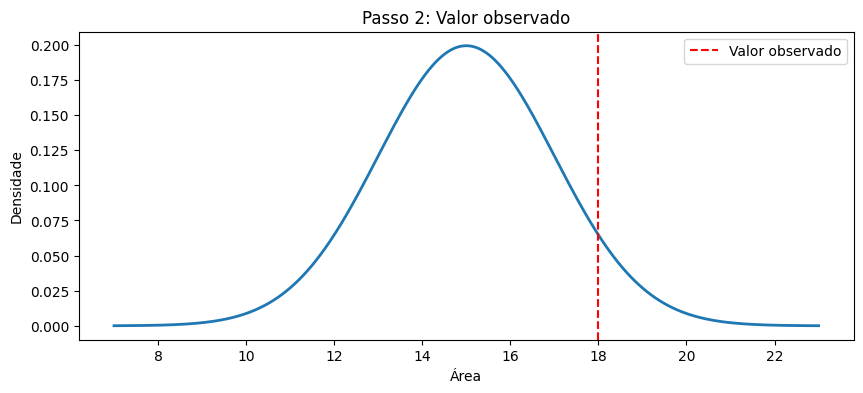

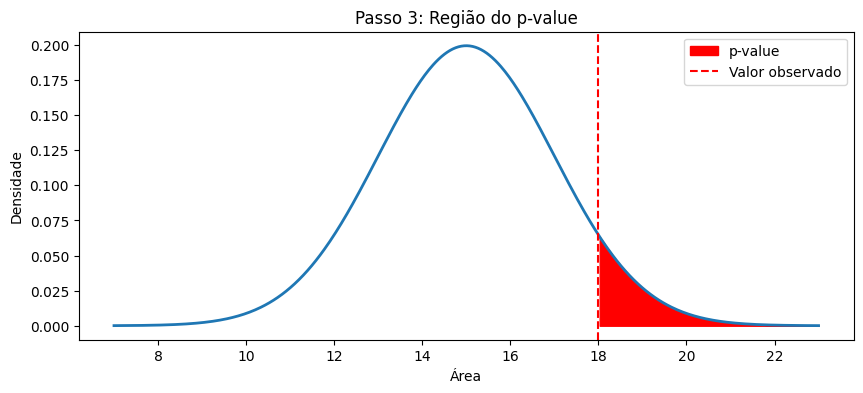

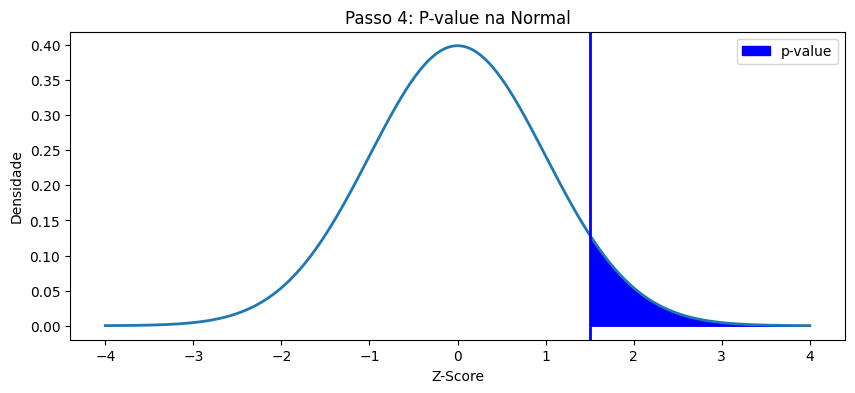

In [24]:
media_hn = 15
desvio_hn = 2
valor_ob = 18

x = np.linspace(media_hn - 4 * desvio_hn, media_hn + 4 * desvio_hn, 500)
y = norm.pdf(x, media_hn, desvio_hn)

plt.figure(figsize=(10, 4))
plt.plot(x, y, linewidth=2)
plt.title("Passo 1: Distribuição da hipótese")
plt.xlabel("Área")
plt.ylabel("Densidade")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(x, y, linewidth=2)
plt.axvline(x=valor_ob, color='r', linestyle='--', label="Valor observado")
plt.title("Passo 2: Valor observado")
plt.xlabel("Área")
plt.ylabel("Densidade")
plt.legend()
plt.show()

mascara = x >= valor
plt.figure(figsize=(10, 4))
plt.plot(x, y, linewidth=2)
plt.fill_between(x[mascara], y[mascara], color='r', label="p-value")
plt.axvline(x=valor_ob, color='r', linestyle='--', label="Valor observado")
plt.title("Passo 3: Região do p-value")
plt.xlabel("Área")
plt.ylabel("Densidade")
plt.legend()
plt.show()

p_value = 1 - norm.cdf(valor_ob, media_hn, desvio_hn)
z_score = (valor_ob - media_hn) / desvio_hn

x_p = np.linspace(-4, 4, 500)
y_p = norm.pdf(x_p, 0, 1)
mascara_p = x_p >= z_score

plt.figure(figsize=(10, 4))
plt.plot(x_p, y_p, linewidth=2)
plt.fill_between(x_p[mascara], y_p[mascara], color='b', label="p-value")
plt.axvline(z_score, color="b", linewidth=2)
plt.title("Passo 4: P-value na Normal")
plt.xlabel("Z-Score")
plt.ylabel("Densidade")
plt.legend()
plt.show()

---
### **D:** *p-value*

#### Crie duas Gaussianas como mostrado abaixo (é só varia a média). Sorteie 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).

---

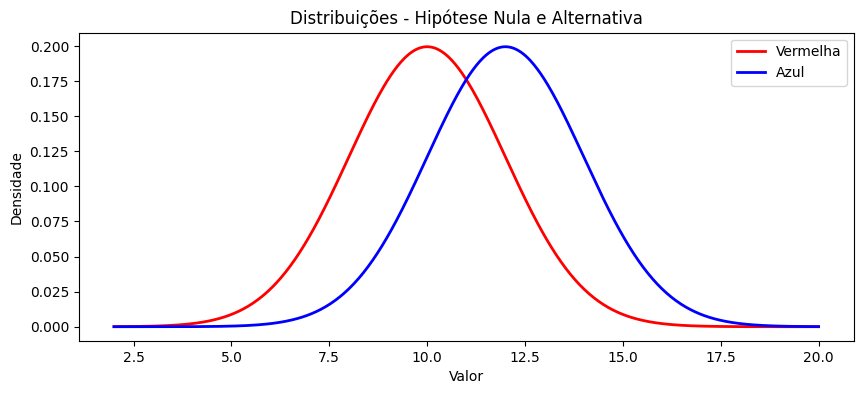

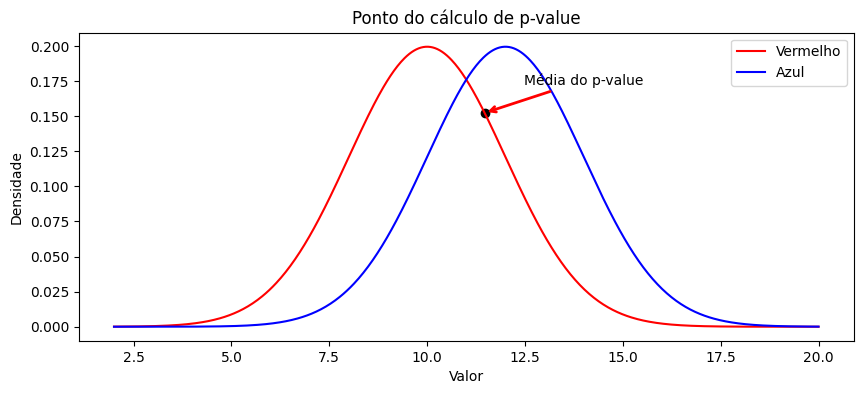

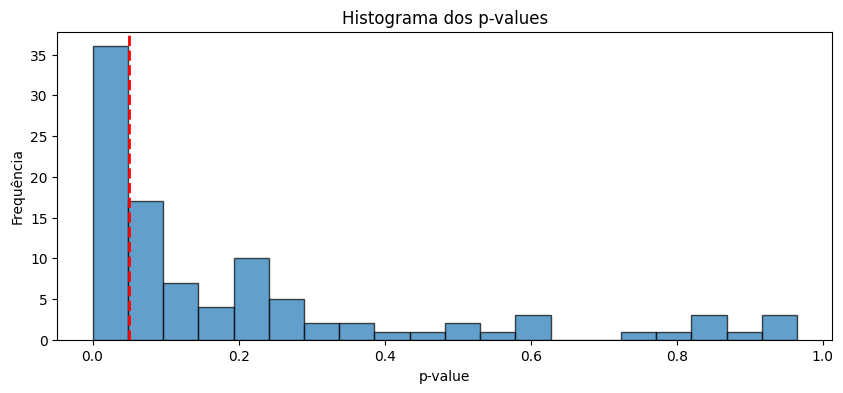


Primeiros p-values:


,p-value,falso_n
0,0.203405,True
1,0.011392,False
2,0.004265,False
3,0.440683,True
4,0.244534,True


In [34]:
np.random.seed(2025)

media_ver = 10
desvio_ver = 2

media_azl = 12
desvio_azl = 2

x = np.linspace(media_ver - 4 * desvio_ver, media_azl + 4 * desvio_azl, 600)
y_ver = norm.pdf(x, media_ver, desvio_ver)
y_azl = norm.pdf(x, media_azl, desvio_azl)

plt.figure(figsize=(10, 4))
plt.plot(x, y_ver, linewidth=2, color='r', label="Vermelha")
plt.plot(x, y_azl, linewidth=2, color='b', label="Azul")
plt.title("Distribuições - Hipótese Nula e Alternativa")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.legend()
plt.show()

n_seq = 100
t_seq = 3

seq_azl = np.random.normal(media_azl, desvio_azl, size=(n_seq, t_seq))

def p_valor(media_ob, n):
  erro = desvio_ver / math.sqrt(n)
  z_score = (media_ob - media_ver) / erro
  return 2 * (1 - norm.cdf(abs(z_score)))

p_valores = []

for seq in seq_azl:
  media_seq = np.mean(seq)
  p = p_valor(media_seq, t_seq)
  p_valores.append(p)

p_valores = np.array(p_valores)

alpha = 0.05
n_falso_neg = np.mean(p_valores > alpha)

seq_ex = seq_azl[0]
media_ex = np.mean(seq_ex)

y_seta = norm.pdf(media_ex, media_ver, desvio_ver)

plt.figure(figsize=(10, 4))
plt.plot(x, y_ver, color='r', label="Vermelho")
plt.plot(x, y_azl, color='b', label="Azul")

plt.scatter(media_ex, y_seta, color='black')
plt.annotate("Média do p-value", xy=(media_ex, y_seta), xytext=(media_ex + 1.0, y_seta + 0.02), arrowprops=dict(arrowstyle="->", color="red", lw=2))
plt.title("Ponto do cálculo de p-value")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(p_valores, bins=20, edgecolor="black", alpha=0.7)
plt.axvline(alpha, color="red", linestyle="--", linewidth=2)
plt.title("Histograma dos p-values")
plt.xlabel("p-value")
plt.ylabel("Frequência")
plt.show()

df_resultado = pd.DataFrame({"p-value": p_valores, "falso_n": p_valores > alpha})

print("\nPrimeiros p-values:")
display(df_resultado.head())